In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn import preprocessing

In [137]:
boston = pd.read_csv('housing_boston.csv', delim_whitespace=True)  # whitespace as separator

# Understanding the data

In [138]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1. **CRIM** - Tingkat kejahatan per kapita berdasarkan kota.  
2. **ZN** - Proporsi lahan hunian yang diatur untuk lot lebih dari 25.000 kaki persegi.  
3. **INDUS** - Proporsi luas lahan bisnis non-ritel per kota.  
4. **CHAS** - Variabel dummy untuk Sungai Charles (1 jika wilayah berbatasan dengan sungai; 0 jika tidak).  
5. **NOX** - Konsentrasi nitrogen oksida (bagian per 10 juta).  
6. **RM** - Rata-rata jumlah kamar per unit hunian.  
7. **AGE** - Proporsi unit hunian yang dimiliki dan dibangun sebelum tahun 1940.  
8. **DIS** - Jarak berbobot ke lima pusat pekerjaan di Boston.  
9. **RAD** - Indeks aksesibilitas ke jalan raya radial.  
10. **TAX** - Tingkat pajak properti dengan nilai penuh per $10.000.  
11. **PTRATIO** - Rasio siswa-guru per kota.  
12. **B** - 1000(Bk - 0,63)^2, di mana Bk adalah proporsi penduduk kulit hitam per kota.  
13. **LSTAT** - Persentase populasi berstatus ekonomi rendah.  
14. **MEDV** - Nilai tengah dari harga rumah yang dimiliki ($1000).  

In [139]:
boston.rename(columns={'CRIM': 'Tingkat_kejahatan', 'ZN': 'Lahan_hunian_iot', 'INDUS': 'Lahan_bisnis_non_ritel', 'CHAS': 'Berbatasan_dg_sungai',
                       'NOX': 'Konsentrasi_NiOk', 'RM': 'Jumlah_kamar', 'DIS': 'Jarak_ke_pusat_pekerjaan', 'RAD': 'Akses_ke_jalan_raya',
                       'PTRATIO': 'Rasio_siswa_guru', 'B': 'Proposi_kulit_hitam', 'LSTAT': 'Persentase_ekonomi_rendah', 'MEDV': 'Median_harga_rumah'}, inplace=True)

In [140]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tingkat_kejahatan          506 non-null    float64
 1   Lahan_hunian_iot           506 non-null    float64
 2   Lahan_bisnis_non_ritel     506 non-null    float64
 3   Berbatasan_dg_sungai       506 non-null    int64  
 4   Konsentrasi_NiOk           506 non-null    float64
 5   Jumlah_kamar               506 non-null    float64
 6   AGE                        506 non-null    float64
 7   Jarak_ke_pusat_pekerjaan   506 non-null    float64
 8   Akses_ke_jalan_raya        506 non-null    int64  
 9   TAX                        506 non-null    float64
 10  Rasio_siswa_guru           506 non-null    float64
 11  Proposi_kulit_hitam        506 non-null    float64
 12  Persentase_ekonomi_rendah  506 non-null    float64
 13  Median_harga_rumah         506 non-null    float64

Dari informasi di atas, menurut kami tipe data tiap kolomnya sudah sesuai

# EDA(Exploratory Data Analysis)

In [141]:
boston.describe()

,Tingkat_kejahatan,Lahan_hunian_iot,Lahan_bisnis_non_ritel,Berbatasan_dg_sungai,Konsentrasi_NiOk,Jumlah_kamar,AGE,Jarak_ke_pusat_pekerjaan,Akses_ke_jalan_raya,TAX,Rasio_siswa_guru,Proposi_kulit_hitam,Persentase_ekonomi_rendah,Median_harga_rumah
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [142]:
boston.isnull().sum()

Tingkat_kejahatan            0
Lahan_hunian_iot             0
Lahan_bisnis_non_ritel       0
Berbatasan_dg_sungai         0
Konsentrasi_NiOk             0
Jumlah_kamar                 0
AGE                          0
Jarak_ke_pusat_pekerjaan     0
Akses_ke_jalan_raya          0
TAX                          0
Rasio_siswa_guru             0
Proposi_kulit_hitam          0
Persentase_ekonomi_rendah    0
Median_harga_rumah           0
dtype: int64

Dari informasi di atas, kita mengetahui bahwa tidak terdapat missing value

In [143]:
boston.duplicated().sum()

0

Dari informasi di atas, kita mengetahui bahwa tidak terdapat duplicate value

In [144]:
check_outlier_CHAS = (boston['Berbatasan_dg_sungai'] < 0) | (boston['Berbatasan_dg_sungai'] > 1)
print(check_outlier_CHAS.sum())

0


In [145]:
Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1

outliers = (boston < (Q1 - 1.5 * IQR)) | (boston > (Q3 + 1.5 * IQR))
outliers = outliers.drop(columns=['Berbatasan_dg_sungai'])
outliers = outliers.drop(columns=['Median_harga_rumah'])

total_outlier = outliers.sum().sum()
print(outliers.sum())
print(f"\nTotal outlier: {total_outlier}")

Tingkat_kejahatan            66
Lahan_hunian_iot             68
Lahan_bisnis_non_ritel        0
Konsentrasi_NiOk              0
Jumlah_kamar                 30
AGE                           0
Jarak_ke_pusat_pekerjaan      5
Akses_ke_jalan_raya           0
TAX                           0
Rasio_siswa_guru             15
Proposi_kulit_hitam          77
Persentase_ekonomi_rendah     7
dtype: int64

Total outlier: 268


Kami menghapus kolom `CHAS` atau `Berbatasan_dg_sungai` dan `MEDV` atau `Median_harga_rumah` dari pengecekan outlier karena dari pengecekan describe, menurut kami keduanya memiliki batas nilai yang wajar. Hasil pengecekan outlier menggunakan IQR (Interquartile Range) menunjukkan bahwa lebih dari 50% data dalam dataset ini terdeteksi sebagai outlier

In [152]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
boston_capped = outliers.clip(lower=lower_bound, upper=upper_bound, axis=1)

boston_capped['Berbatasan_dg_sungai'] = boston['Berbatasan_dg_sungai']
boston_capped['Median_harga_rumah'] = boston['Median_harga_rumah']


print(boston_capped.shape)

(506, 14)


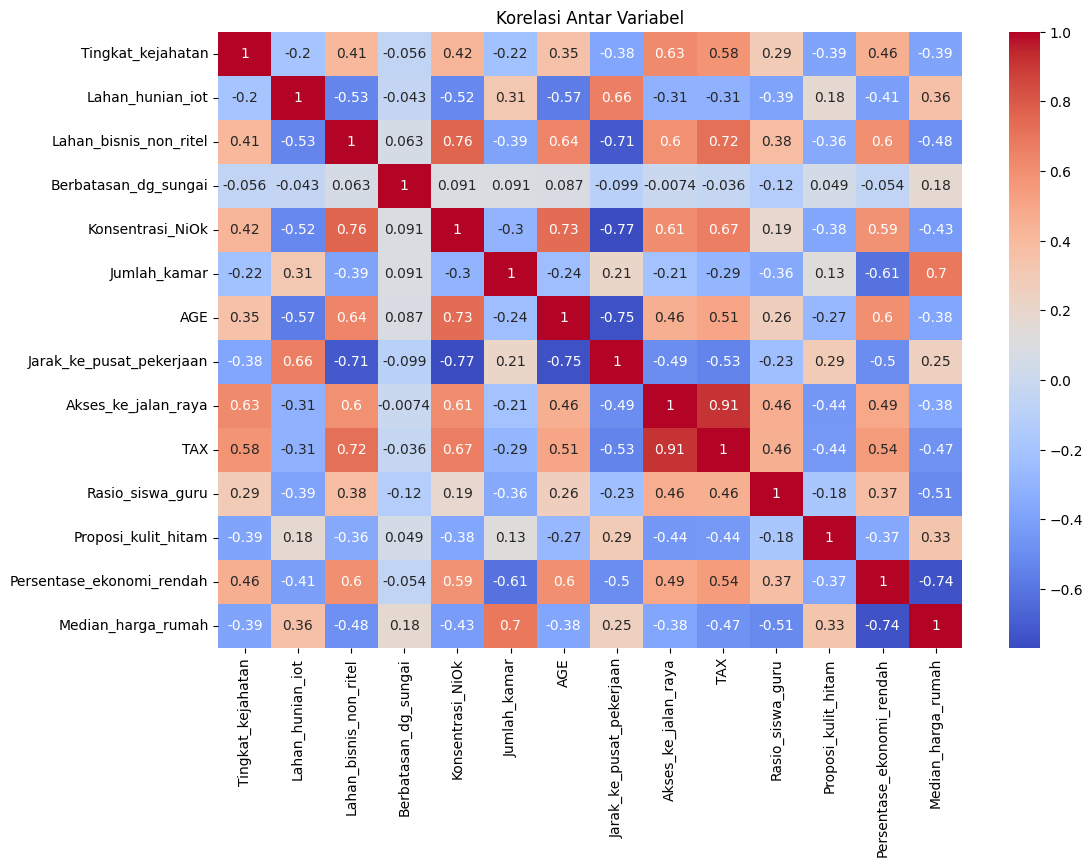

In [147]:
plt.figure(figsize=(12, 8))
sns.heatmap(boston.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Variabel")
plt.show()

In [148]:
# sns.histplot(x="MEDV",data=boston,bins=50)

## 3. Data Visualization

KeyError: 'RM'

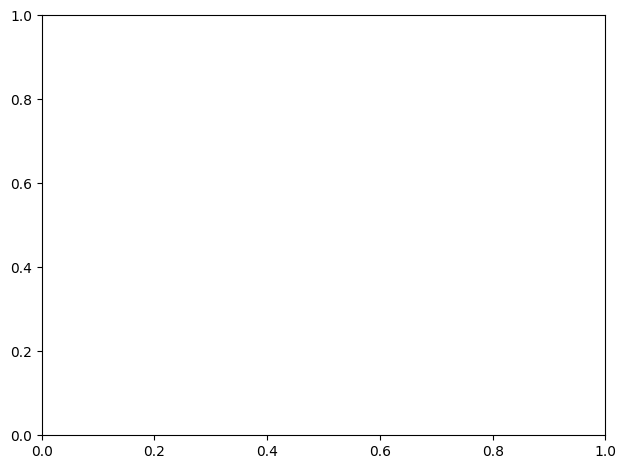

In [149]:
plt.figure(figsize=(16, 12))

# 1: korelasi medv dengan jumlah kamar
plt.subplot(2, 2, 1)
sns.regplot(x="RM", y="MEDV", data=boston, fit_reg=True)
plt.title("Korelasi MEDV dengan Jumlah Kamar")

# 2: korelasi medv dengan persentase penduduk dengan status sosial ekonomi rendah
plt.subplot(2, 2, 2)
sns.regplot(x="LSTAT", y="MEDV", data=boston, fit_reg=True)
plt.title("Korelasi MEDV dengan Persentase Penduduk dengan Status Sosial Ekonomi Rendah")

plt.tight_layout()
plt.show()

Hasilnya adalah:

1.korelasi MEDV dengan Jumlah Kamar (RM)
grafik menunjukkan korelasi positif yang cukup kuat antara jumlah kamar (RM) dan harga rumah (MEDV). semakin banyak jumlah kamar di suatu rumah, semakin tinggi harga median rumah tersebut.

2.korelasi MEDV dengan Persentase Penduduk dengan Status Sosial Ekonomi Rendah (LSTAT)
terdapat korelasi negatif yang signifikan antara LSTAT dan MEDV. semakin tinggi persentase penduduk berstatus sosial ekonomi rendah di suatu daerah, semakin rendah harga median rumah. ini menunjukkan bahwa wilayah dengan penduduk berpenghasilan rendah cenderung memiliki nilai properti yang lebih rendah.

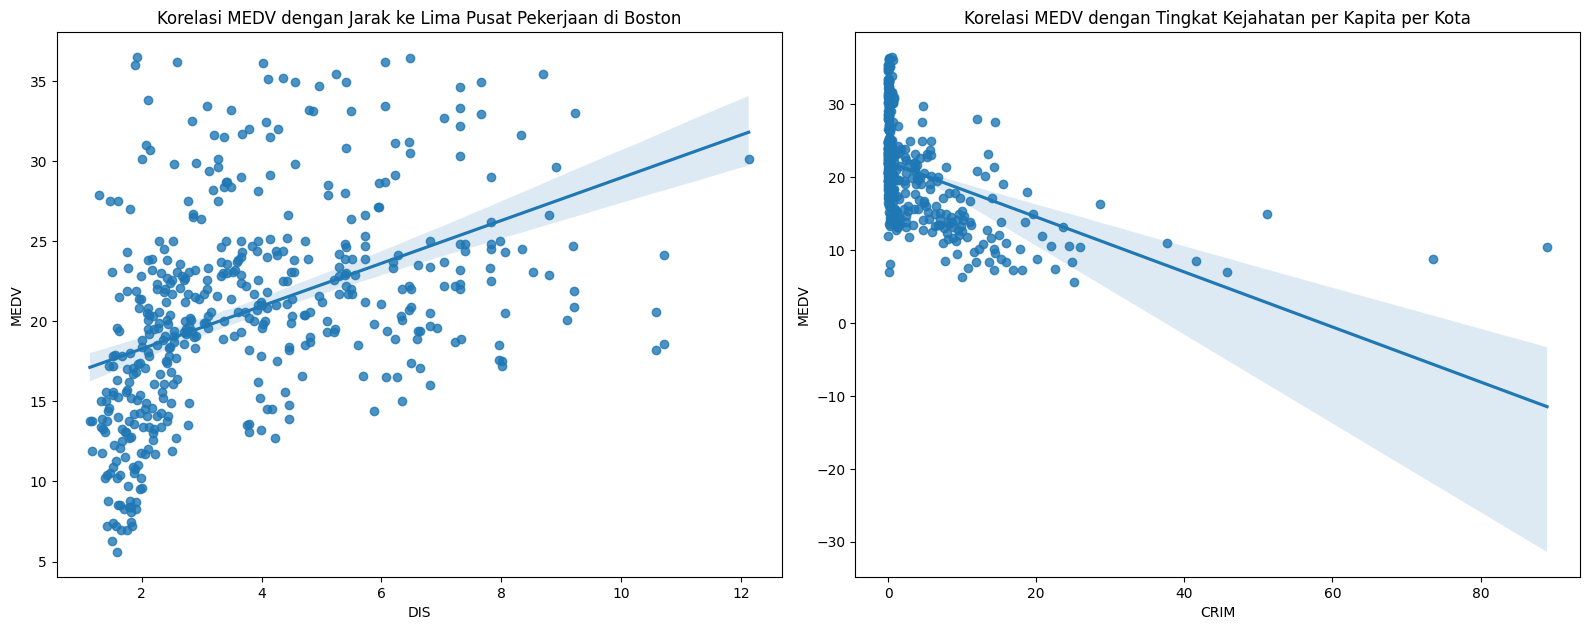

In [ ]:
plt.figure(figsize=(16, 12))

# 3: korelasi MEDV dengan Jarak Terhitung ke Lima Pusat Pekerjaan di Boston
plt.subplot(2, 2, 1)
sns.regplot(x="DIS", y="MEDV", data=boston, fit_reg=True)
plt.title("Korelasi MEDV dengan Jarak ke Lima Pusat Pekerjaan di Boston")

# 4: korelasi MEDV dengan Tingkat Kejahatan per Kapita per Kota
plt.subplot(2, 2, 2)
sns.regplot(x="CRIM", y="MEDV", data=boston, fit_reg=True)
plt.title("Korelasi MEDV dengan Tingkat Kejahatan per Kapita per Kota")

# Mengatur layout agar tidak overlapping
plt.tight_layout()
plt.show()

Hasilnya adalah:

1.Korelasi MEDV dengan Jarak ke Lima Pusat Pekerjaan di Boston (DIS)
harga rumah cenderung sedikit meningkat seiring bertambahnya jarak ke pusat pekerjaan. jarak ke pusat pekerjaan (DIS) mungkin bukan faktor utama yang menentukan harga rumah, tetapi ada sedikit tren positif.

2.Korelasi MEDV dengan Tingkat Kejahatan per Kapita per Kota (CRIM)
semakin tinggi tingkat kejahatan (CRIM), semakin rendah harga rumah median. wilayah dengan tingkat kejahatan yang lebih tinggi cenderung memiliki harga properti yang lebih rendah.